# Customer Personality Analysis

#### Need to perform clustering to summarize customer segments.

In [2]:
# Import Libraries
import pandas as pd
import numpy as np

# visualisation
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

# preprocessing
from sklearn.preprocessing import StandardScaler

# pca
from sklearn.decomposition import PCA

# clustering
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans, AgglomerativeClustering

# evaluations
from sklearn.metrics import confusion_matrix

# ignore warnings
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter(action = 'ignore', category = FutureWarning)

In [3]:
data = pd.read_excel("marketing_campaig.xlsx")
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [4]:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

In [6]:
data.describe().T

,count,mean,min,25%,50%,75%,max,std
ID,2240.0,5592.159821,0.0,2828.25,5458.5,8427.75,11191.0,3246.662198
Year_Birth,2240.0,1968.805804,1893.0,1959.0,1970.0,1977.0,1996.0,11.984069
Income,2216.0,52247.251354,1730.0,35303.0,51381.5,68522.0,666666.0,25173.076661
Kidhome,2240.0,0.444196,0.0,0.0,0.0,1.0,2.0,0.538398
Teenhome,2240.0,0.50625,0.0,0.0,0.0,1.0,2.0,0.544538
Dt_Customer,2240,2013-07-10 10:01:42.857142784,2012-07-30 00:00:00,2013-01-16 00:00:00,2013-07-08 12:00:00,2013-12-30 06:00:00,2014-06-29 00:00:00,NaN
Recency,2240.0,49.109375,0.0,24.0,49.0,74.0,99.0,28.962453
MntWines,2240.0,303.935714,0.0,23.75,173.5,504.25,1493.0,336.597393
MntFruits,2240.0,26.302232,0.0,1.0,8.0,33.0,199.0,39.773434
MntMeatProducts,2240.0,166.95,0.0,16.0,67.0,232.0,1725.0,225.715373


In [7]:
data.shape

(2240, 29)

In [8]:
data.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [9]:
data[data.duplicated()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response


In [10]:
data.head(15)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1,2013-09-09,16,520,...,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635.0,0,1,2012-11-13,34,235,...,6,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,33454.0,1,0,2013-05-08,32,76,...,8,0,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,30351.0,1,0,2013-06-06,19,14,...,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,5648.0,1,1,2014-03-13,68,28,...,20,1,0,0,0,0,0,3,11,0


In [11]:
data.dtypes

ID                              int64
Year_Birth                      int64
Education                      object
Marital_Status                 object
Income                        float64
Kidhome                         int64
Teenhome                        int64
Dt_Customer            datetime64[ns]
Recency                         int64
MntWines                        int64
MntFruits                       int64
MntMeatProducts                 int64
MntFishProducts                 int64
MntSweetProducts                int64
MntGoldProds                    int64
NumDealsPurchases               int64
NumWebPurchases                 int64
NumCatalogPurchases             int64
NumStorePurchases               int64
NumWebVisitsMonth               int64
AcceptedCmp3                    int64
AcceptedCmp4                    int64
AcceptedCmp5                    int64
AcceptedCmp1                    int64
AcceptedCmp2                    int64
Complain                        int64
Z_CostContac

In [12]:
df = data.copy()
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,3,0,0,0,0,0,0,3,11,0


In [13]:
df.drop(['ID'], axis=1, inplace=True)
df

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,...,7,0,0,0,0,0,0,3,11,1
1,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,...,5,0,0,0,0,0,0,3,11,0
2,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,...,4,0,0,0,0,0,0,3,11,0
3,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,...,6,0,0,0,0,0,0,3,11,0
4,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,43,...,5,0,0,0,0,0,0,3,11,0
2236,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,0,...,7,0,0,0,1,0,0,3,11,0
2237,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,48,...,6,0,1,0,0,0,0,3,11,0
2238,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,30,...,3,0,0,0,0,0,0,3,11,0


In [14]:
print('The most recent enrollment of a customer:', max(df['Dt_Customer']))
print('The oldest enrollment of a customer:', min(df['Dt_Customer']))

The most recent enrollment of a customer: 2014-06-29 00:00:00
The oldest enrollment of a customer: 2012-07-30 00:00:00


In [15]:
# Extract the "Age" of a customer by the "Year_Birth" indicating the birth year of the respective person.
df['Age'] = 2015 - data['Year_Birth']

In [16]:
df.drop(['Year_Birth', 'Dt_Customer', 'Z_CostContact', 'Z_Revenue'], axis=1, inplace=True)

In [17]:
df.head(2)

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age
0,Graduation,Single,58138.0,0,0,58,635,88,546,172,...,4,7,0,0,0,0,0,0,1,58
1,Graduation,Single,46344.0,1,1,38,11,1,6,2,...,2,5,0,0,0,0,0,0,0,61


In [18]:
df['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [19]:
# Relationship Status
df['Rship_status'] = df['Marital_Status'].replace({'Married':'Taken',
                                                   'Together':'Taken',
                                                   'Absurd':'Single',
                                                   'Widow':'Single',
                                                   'Alone':'Single',
                                                   'YOLO':'Single',
                                                   'Divorced':'Single'})

In [20]:
mnt =[feature for feature in df.columns if "Mnt" in feature]
mnt

['MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds']

In [21]:
# amount spent on all types of purchases in last 2 years
df['Spent'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

In [22]:
# families with kids
df['Children'] = df['Kidhome'] + df['Teenhome']

In [23]:
# outliers
def detect_outliers(d):
  for i in d:
    Q3, Q1 = np.percentile(df[i], [75 ,25])
    IQR = Q3 - Q1

    ul = Q3+1.5*IQR
    ll = Q1-1.5*IQR

    outliers = df[i][(df[i] > ul) | (df[i] < ll)]
    print(f'*** {i} outlier points***', '\n', outliers, '\n')

In [24]:
# Numerical Features
num = [feature for feature in df.columns if df[feature].dtypes != 'O']
num

['Income',
 'Kidhome',
 'Teenhome',
 'Recency',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth',
 'AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'AcceptedCmp1',
 'AcceptedCmp2',
 'Complain',
 'Response',
 'Age',
 'Spent',
 'Children']

In [25]:
n = ['Income', 'Recency', 'Age', 'Spent']
detect_outliers(n)

*** Income outlier points*** 
 Series([], Name: Income, dtype: float64) 

*** Recency outlier points*** 
 Series([], Name: Recency, dtype: int64) 

*** Age outlier points*** 
 192    115
239    122
339    116
Name: Age, dtype: int64 

*** Spent outlier points*** 
 1179    2525
1492    2524
1572    2525
Name: Spent, dtype: int64 



<Axes: xlabel='Income'>

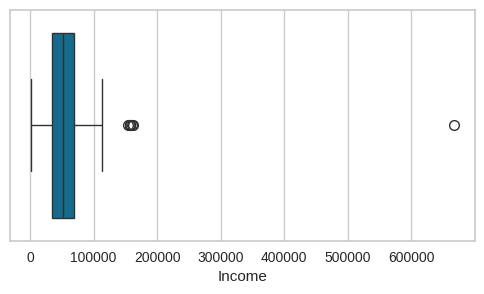

In [26]:
plt.figure(figsize=(6,3))
sns.boxplot(data=df, x='Income')

<Axes: xlabel='Recency'>

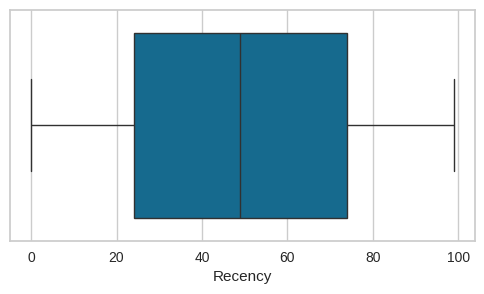

In [27]:
plt.figure(figsize=(6,3))
sns.boxplot(data=df, x='Recency')

<Axes: xlabel='Age'>

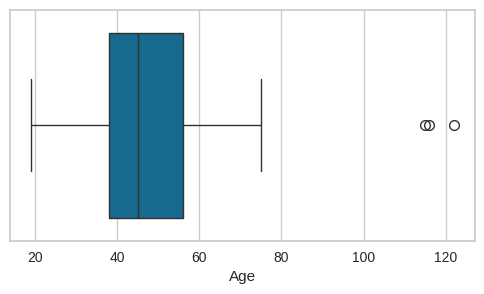

In [28]:
plt.figure(figsize=(6,3))
sns.boxplot(data=df, x='Age')

<Axes: xlabel='Spent'>

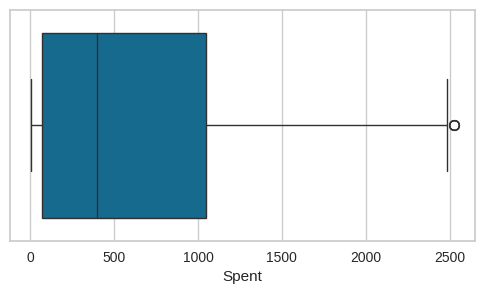

In [29]:
plt.figure(figsize=(6,3))
sns.boxplot(data=df, x='Spent')

In [30]:
# We will drop some outliers

df = df[(df['Age']<100)]
df = df[(df['Income']<600000)]

In [31]:
df.shape

(2212, 28)

<Axes: xlabel='Rship_status', ylabel='count'>

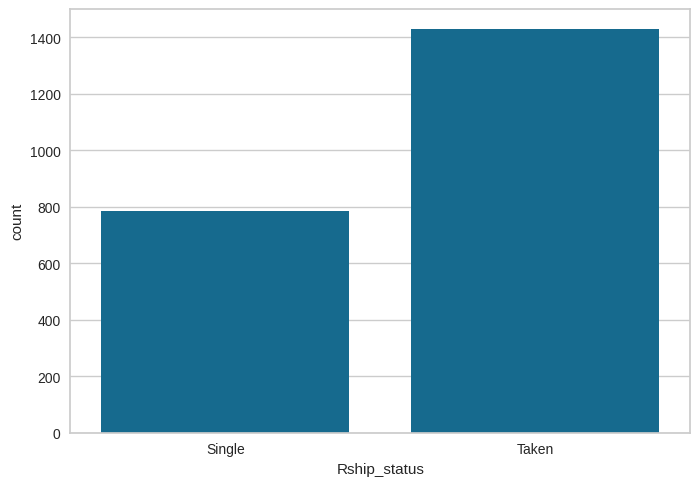

In [32]:
sns.countplot(x = 'Rship_status',data = df)

OBV:
- people in a relationship whether it be just 'Together' or 'Married' are ALMOST twice the amount of people who are single.

In [33]:
df['Education'].value_counts()

Education
Graduation    1115
PhD            480
Master         365
2n Cycle       198
Basic           54
Name: count, dtype: int64

<Axes: xlabel='Education', ylabel='count'>

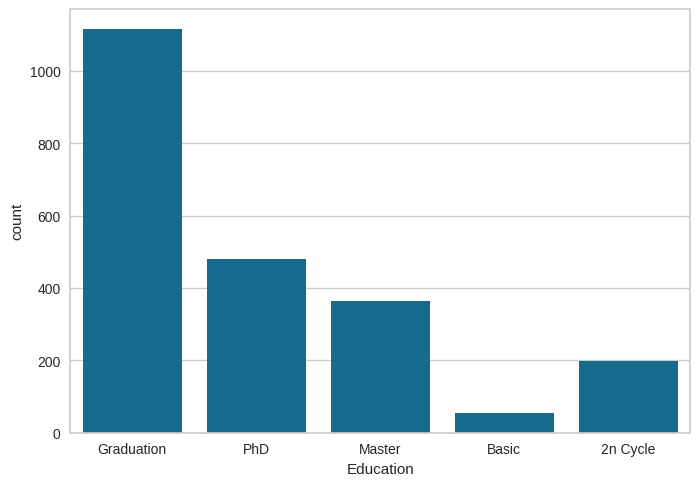

In [34]:
sns.countplot(x='Education', data=df)

<Axes: xlabel='Age', ylabel='count'>

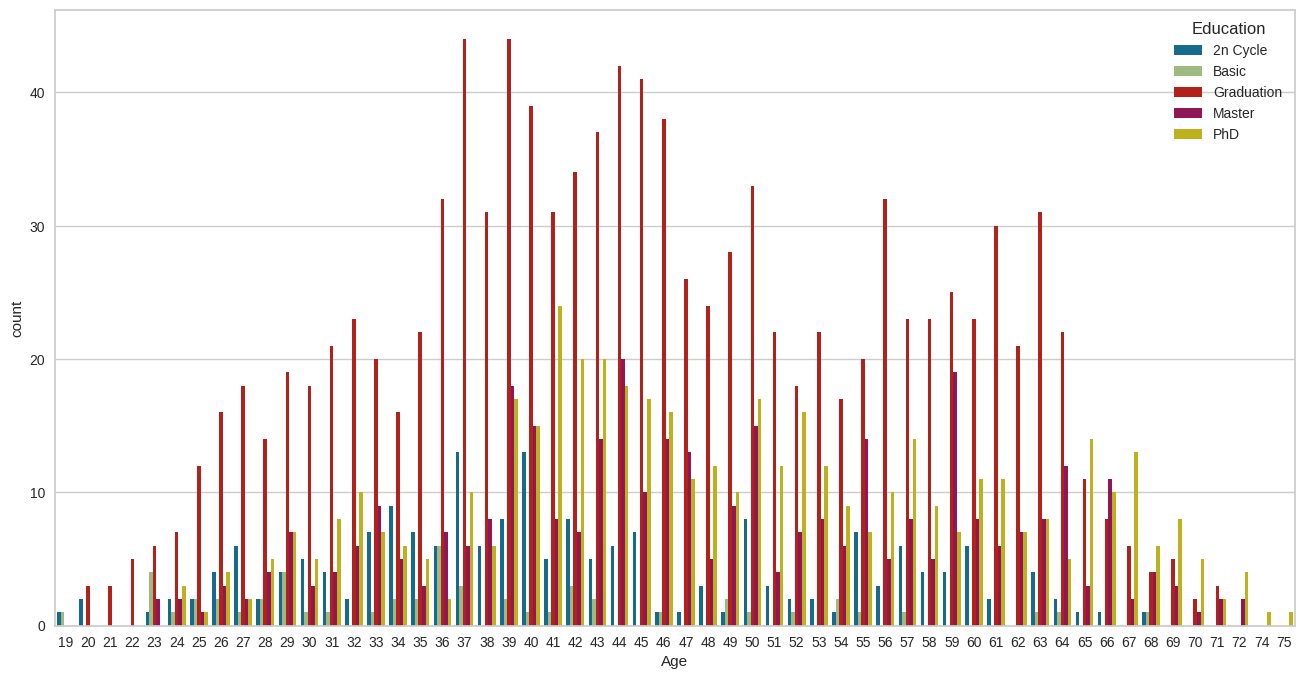

In [35]:
plt.figure(figsize=(16,8))
sns.countplot(x='Age', data=df, hue=df['Education'])

OBV:
- Most common level of education is Graduation.
- From the ages 32 to 64 alot of people have Graduation degrees.
- From ages 39 to 59 have most no. of Masters.
- ppl who have most no. of PhD degrees are of age 41.

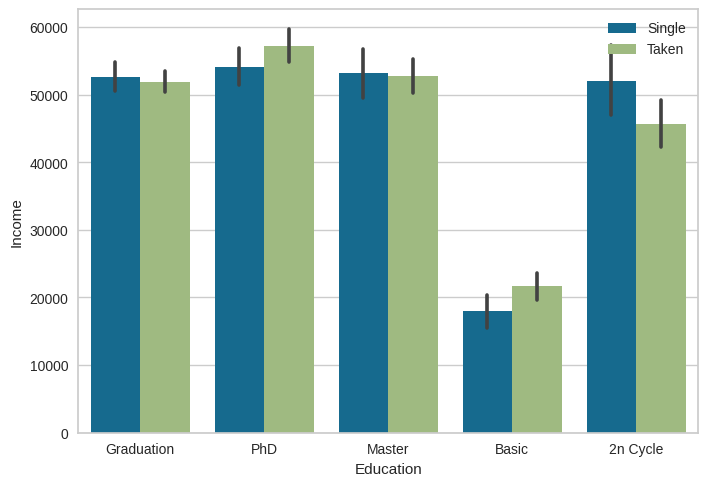

In [36]:
# custom_palette = ["#FF0000", "#00FF00", "#0000FF", "#FFFF00", "#FF00FF", "#808080", "#800000", "#808000"]
sns.barplot(x='Education', y='Income', data=df,
            hue='Rship_status')
plt.legend(loc='upper right')
plt.show()

OBV:
- There isn't much drastic differences between 'Single' and 'Taken' ppl's Income by their Education levels.

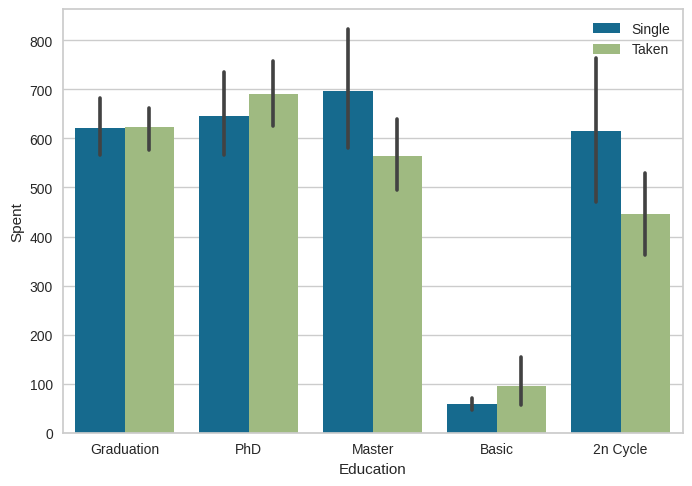

In [37]:
sns.barplot(x='Education', y='Spent', data=df,
            hue='Rship_status')
plt.legend(loc='upper right')
plt.show()

OBV:
- By surprise Graduate 'single' and 'taken' ppl spend the almost the exact amount.
- while i assumed that 'taken' ppl who have done Masters would spend more than the 'singles' was False.

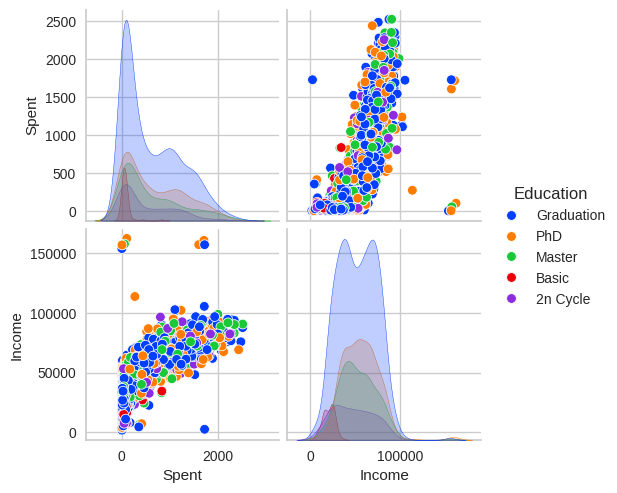

In [38]:
sns.pairplot(df, vars=['Spent','Income'], hue='Education', palette='bright')

OBV:
- Most people regulate their spending depending on their Income but still there are few outliers.

In [39]:
df['Children'].unique()

array([0, 2, 1, 3])

In [40]:
df['Children'].value_counts()

Children
1    1114
0     632
2     416
3      50
Name: count, dtype: int64

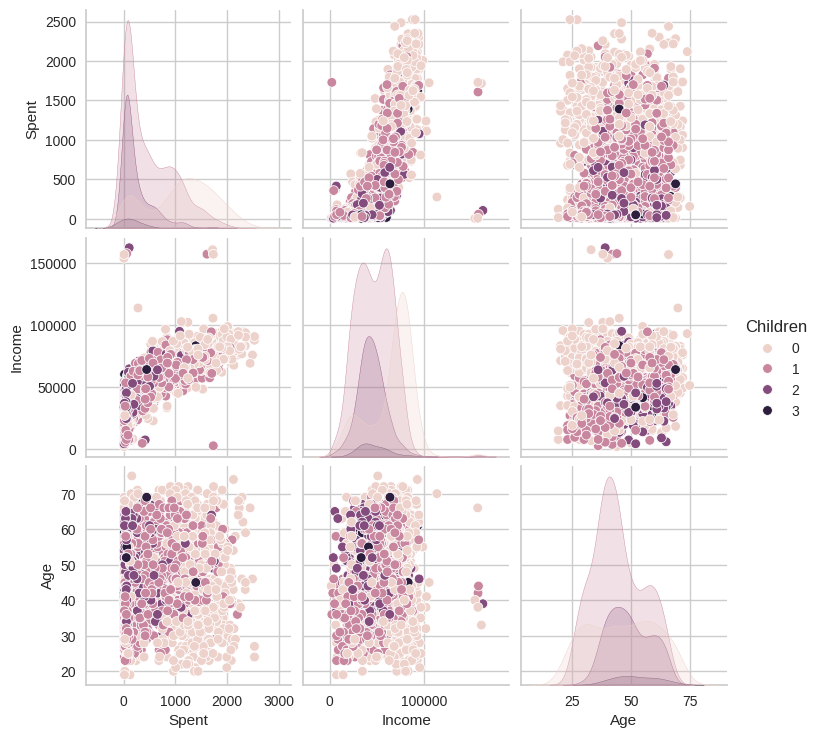

In [41]:
sns.pairplot(df, vars=['Spent','Income','Age'], hue='Children')

OBV:
- people with 0 kids spend the MOST doesnt matter their Income or Age.
- people with 3 kids, even if they earn good they spend the LEAST.
- ppl with 1 or 2 kids are like in the middle ground in spending.

In [42]:
# numerical features
df[num].head(3)

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Spent,Children
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,0,0,1,58,1617,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,0,0,0,61,27,2
2,71613.0,0,0,26,426,49,127,111,21,42,...,0,0,0,0,0,0,0,50,776,0


In [43]:
mnt

['MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds']

In [44]:
# Categorical Features
cat = [feature for feature in df.columns if df[feature].dtypes == 'O']
cat

['Education', 'Marital_Status', 'Rship_status']

<Axes: >

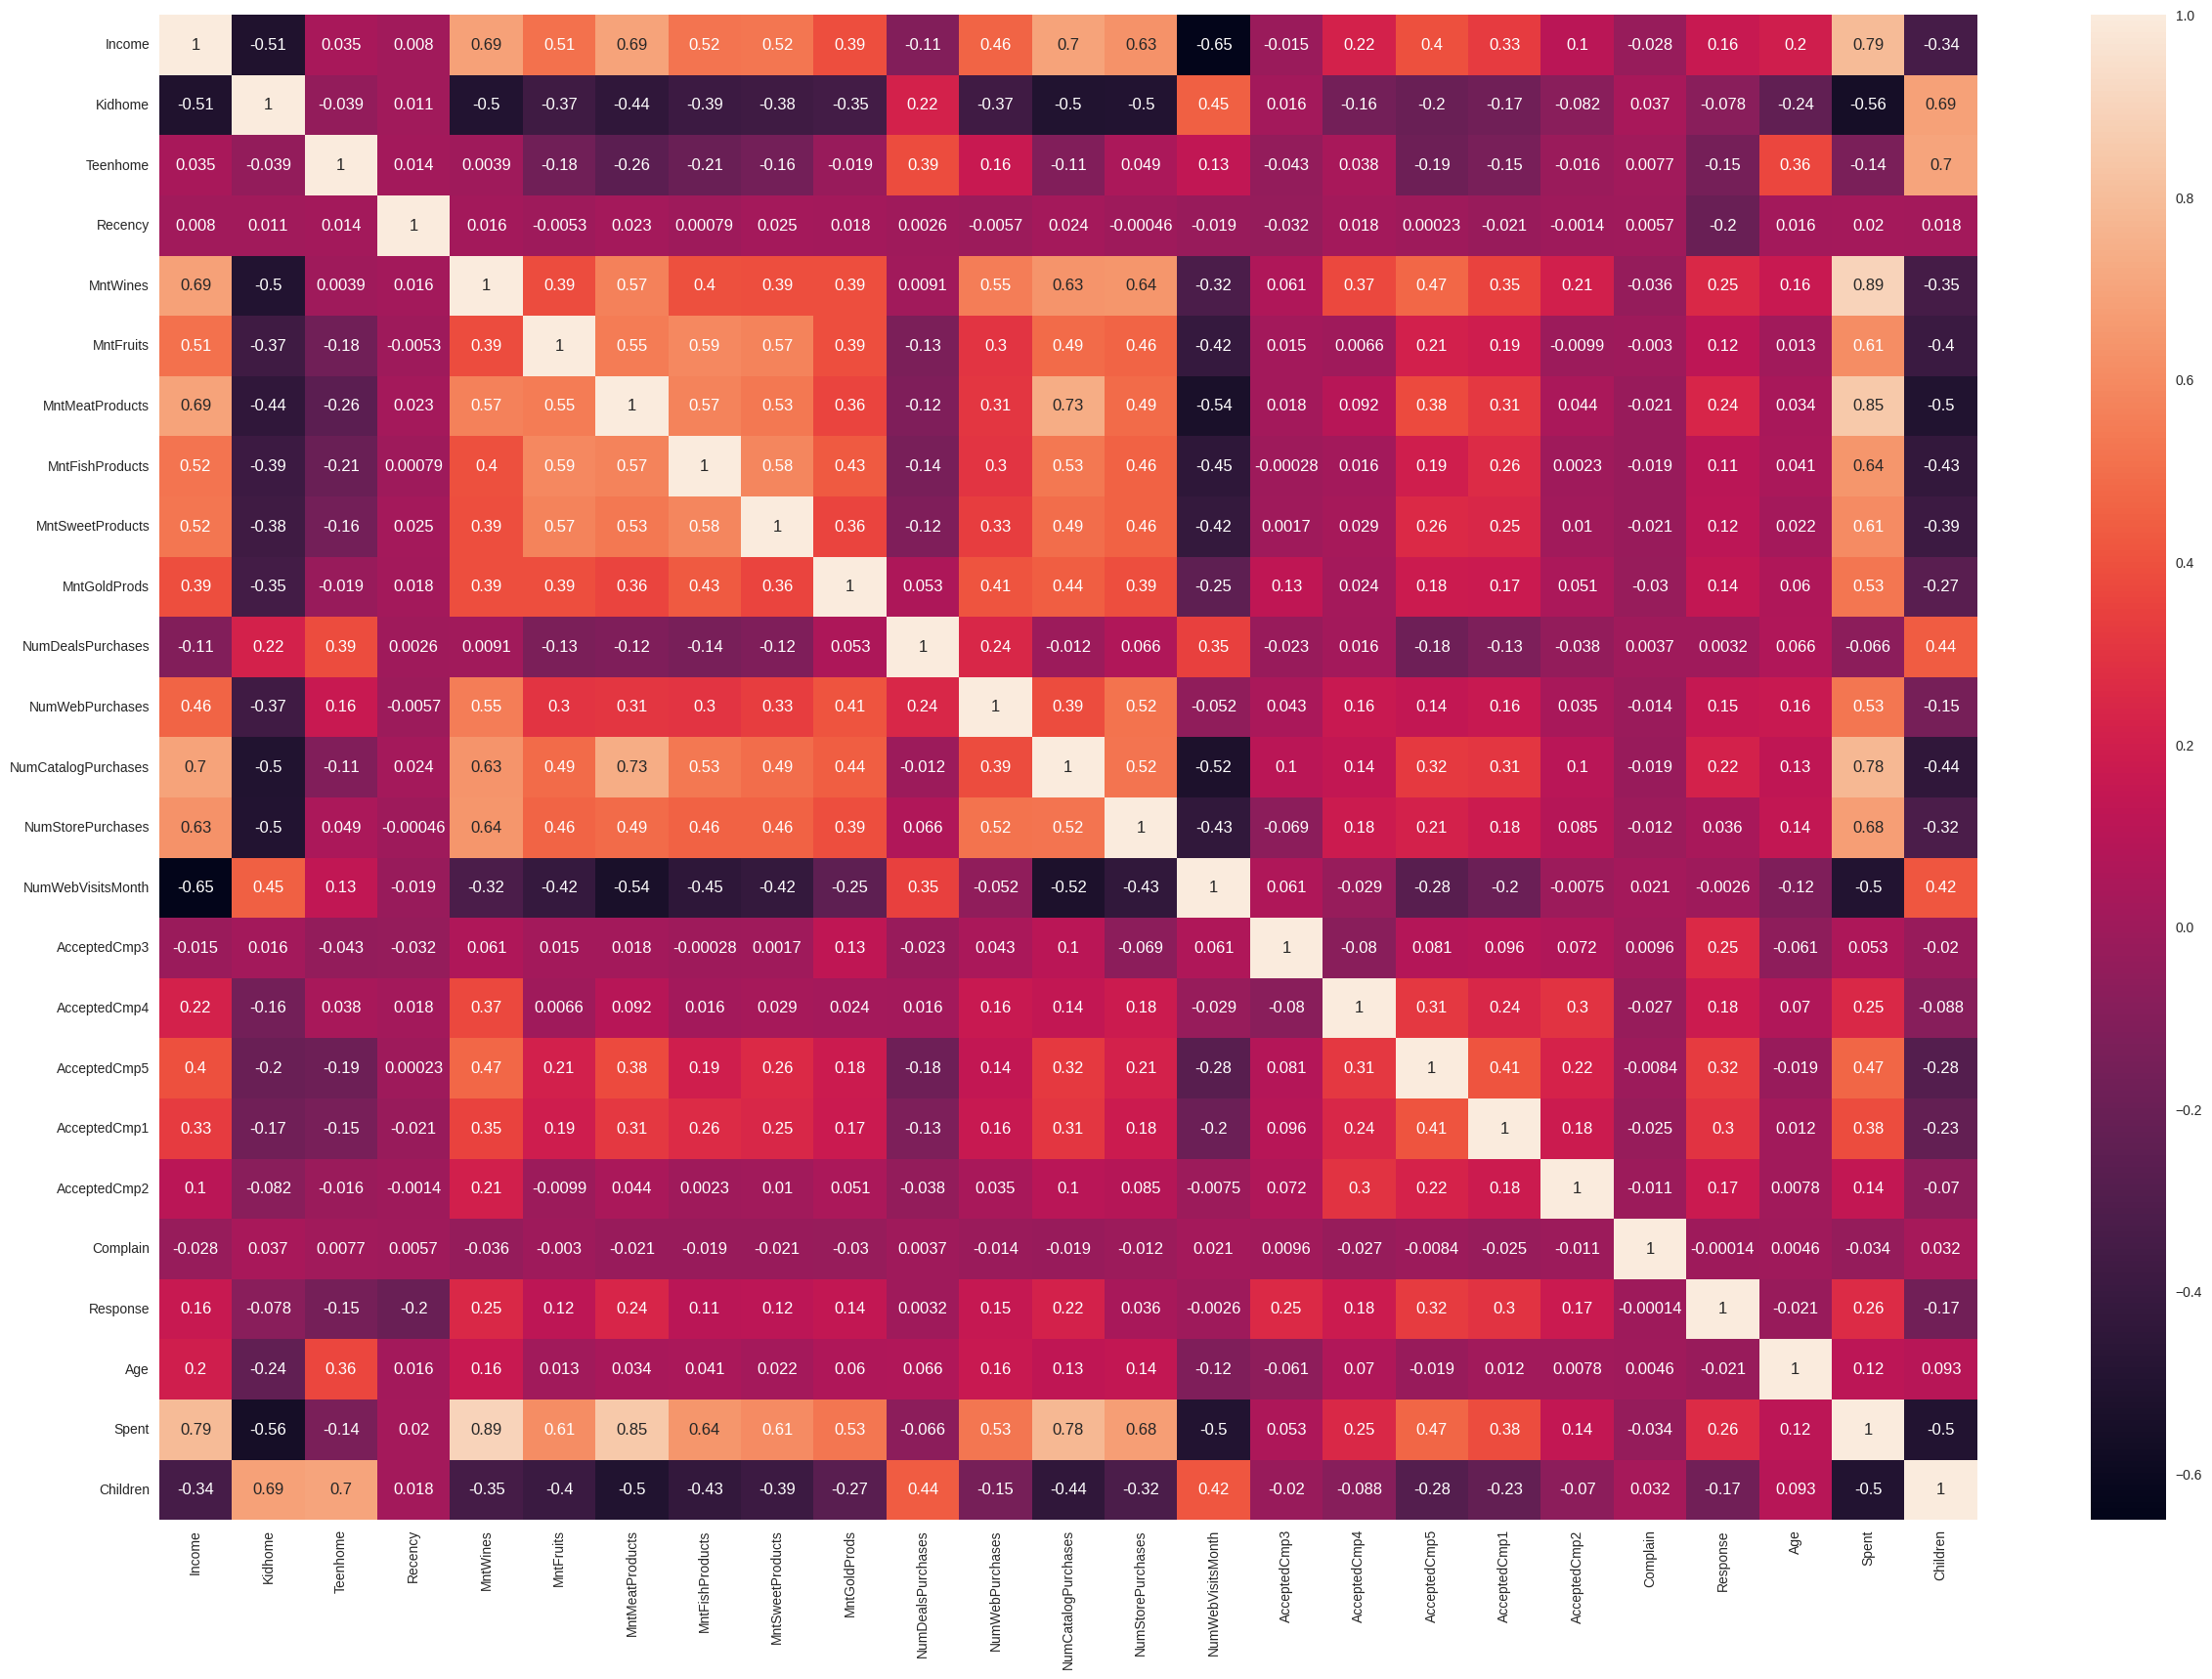

In [45]:
plt.figure(figsize=(30,20))
sns.heatmap(df.corr(numeric_only=True),annot=True)

### Standardizing the data

In [46]:
scaler = StandardScaler()
numeric_data = df.select_dtypes(include=['number'])
sd = scaler.fit_transform(numeric_data)

In [47]:
sd

array([[ 0.28710487, -0.82275354, -0.92969866, ...,  1.01835202,
         1.67624537, -1.26459792],
       [-0.26088203,  1.04002111,  0.90809708, ...,  1.27478522,
        -0.96329696,  1.4045725 ],
       [ 0.9131964 , -0.82275354, -0.92969866, ...,  0.33453017,
         0.28011009, -1.26459792],
       ...,
       [ 0.23334696, -0.82275354, -0.92969866, ..., -1.03311355,
         1.05205171, -1.26459792],
       [ 0.80317156, -0.82275354,  0.90809708, ...,  1.10382975,
         0.39133608,  0.06998729],
       [ 0.04229031,  1.04002111,  0.90809708, ...,  1.27478522,
        -0.72258398,  1.4045725 ]])

### Dimension Reduction

In [48]:
# PCA
pca = PCA(n_components=3)
pca_data = pca.fit_transform(sd)

### Clustering

In [49]:
pca_data

array([[ 4.28638165, -0.13461941, -0.32430861],
       [-2.82237011,  0.56337368, -0.21049745],
       [ 1.91761021, -0.45427183, -1.12459177],
       ...,
       [ 2.01554226, -0.43422603,  0.94587734],
       [ 1.73870846,  1.30378561, -1.16468709],
       [-2.09896725,  1.21505559,  1.0671014 ]])

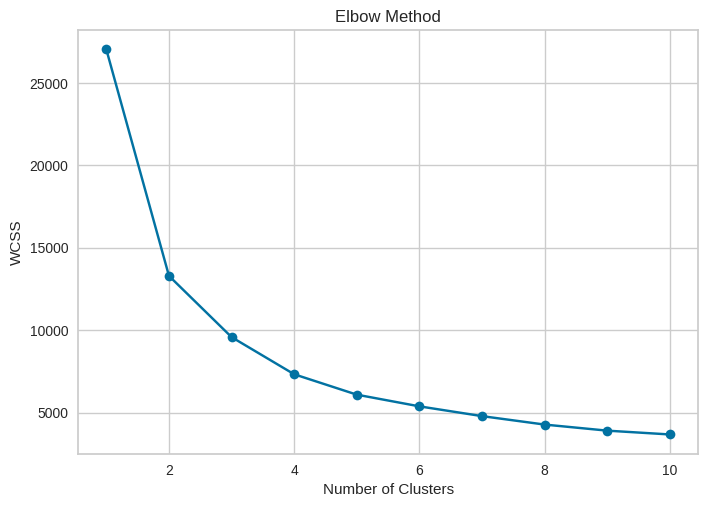

In [50]:
# Using Elbow Method to find the number of cluters needed

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++',
                    max_iter=300, n_init=10, random_state=0)
    kmeans.fit(pca_data)
    wcss.append(kmeans.inertia_)

# Plotting the elbow curve
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

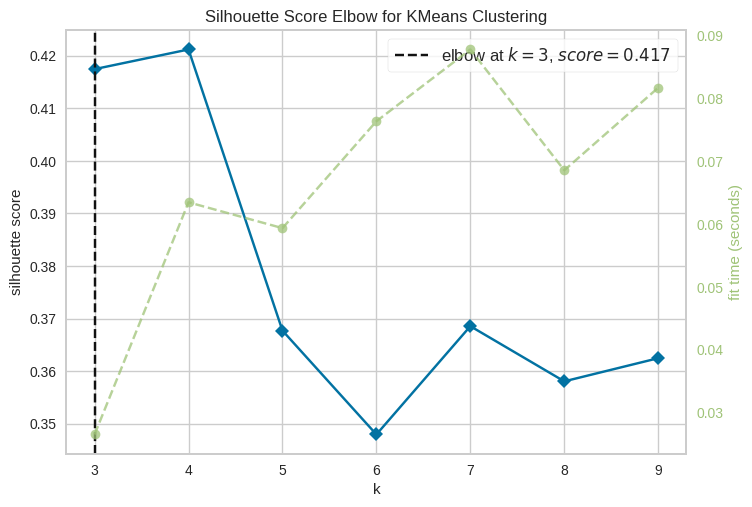

In [51]:
Elbow_M = KElbowVisualizer(KMeans(), k=(3,10), metric='silhouette')
Elbow_M.fit(pca_data)
Elbow_M.show();

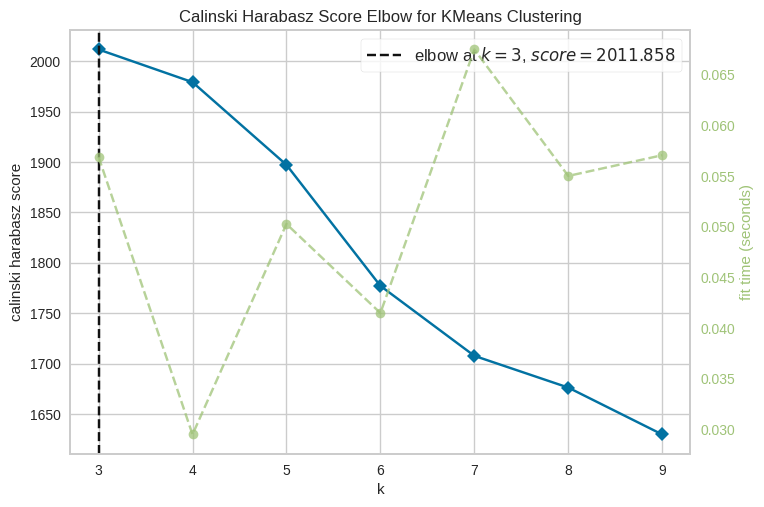

In [52]:
Elbow_M = KElbowVisualizer(KMeans(), k=(3,10), metric='calinski_harabasz')
Elbow_M.fit(pca_data)
Elbow_M.show();

### Clustering

In [53]:
k = 3  # number of clusters
kmeans = KMeans(n_clusters=k, init='k-means++',
                max_iter = 300, n_init = 10, random_state=0)

# Fit the KMeans model to your data
kmeans.fit(pca_data)

# Predicting Clusters
predicted_clusters = kmeans.predict(pca_data)

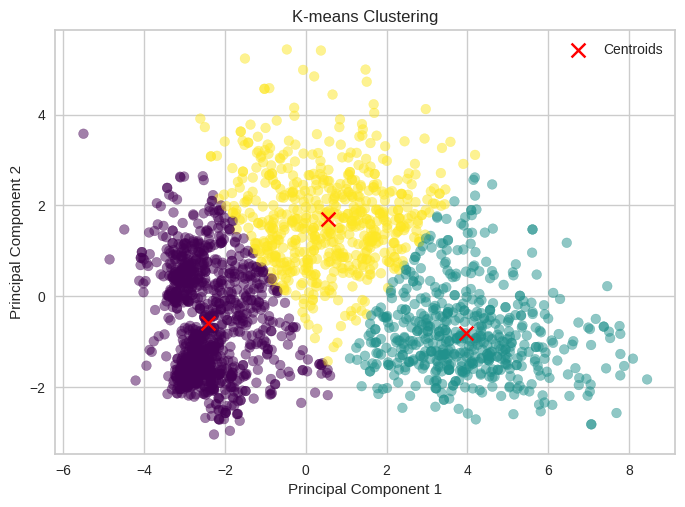

In [54]:
# Plot the data points colored by predicted cluster labels
plt.scatter(pca_data[:, 0], pca_data[:, 1],
            c=predicted_clusters, cmap='viridis',
            marker='o', alpha=0.5)

# Plot cluster centroids (if available)
plt.scatter(kmeans.cluster_centers_[:, 0],
            kmeans.cluster_centers_[:, 1], c='red',
            marker='x', s=100, label='Centroids')

plt.title('K-means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

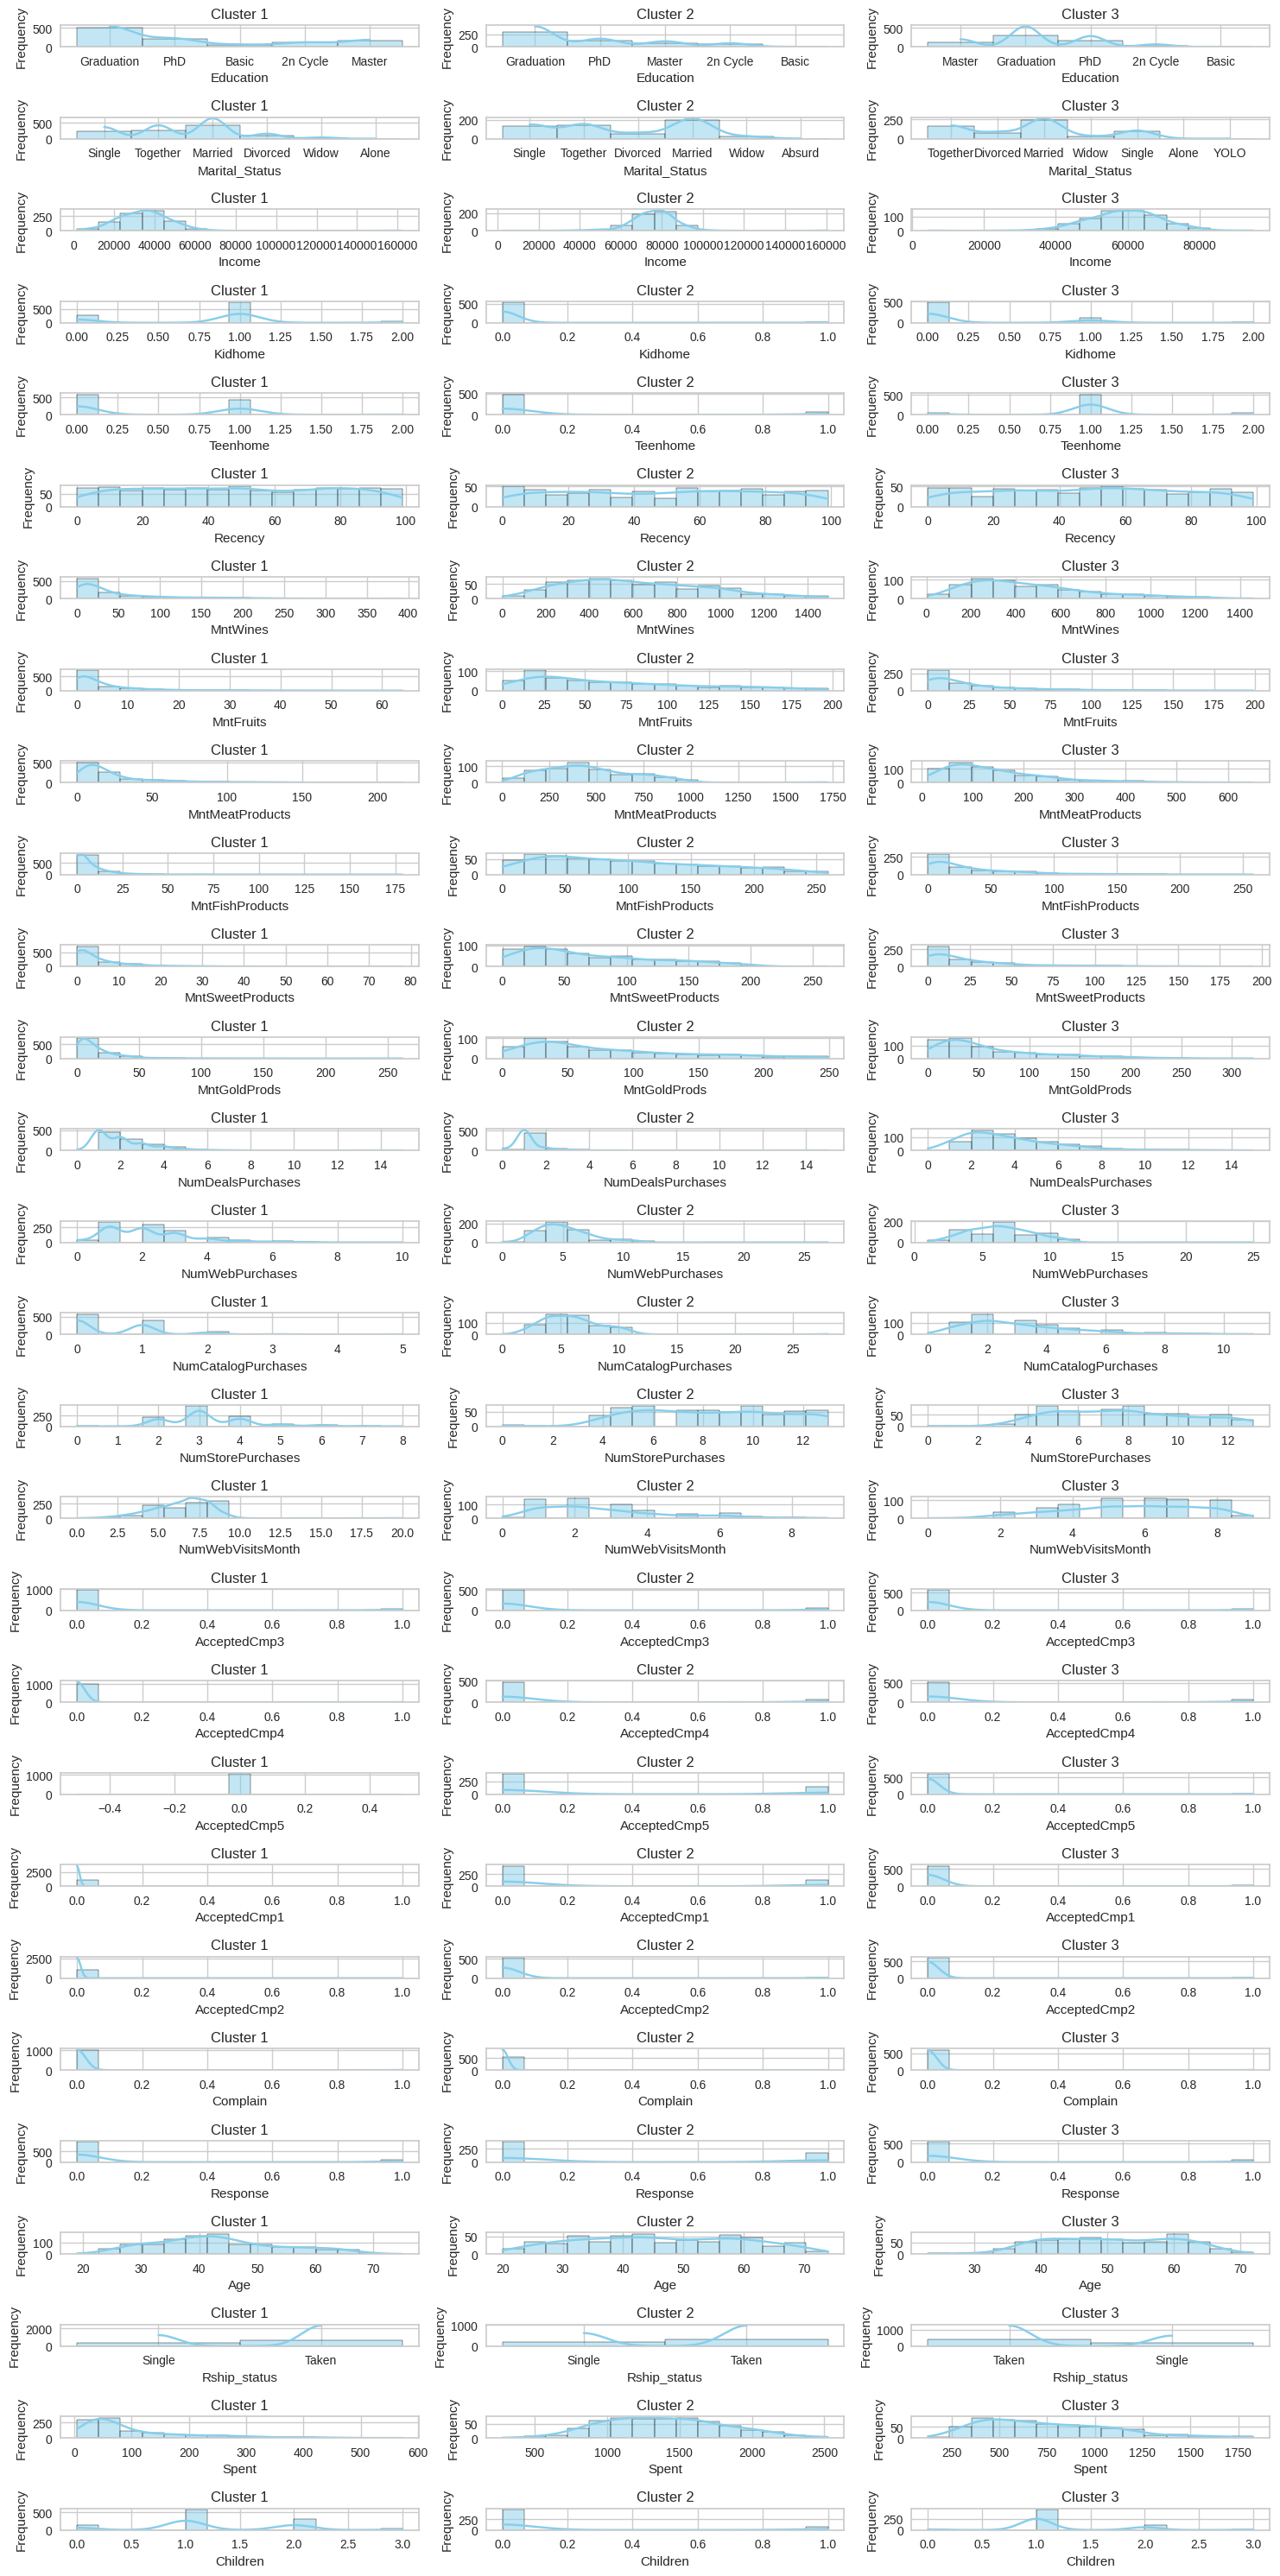

In [55]:
# subplots for each feature
fig, axes = plt.subplots(nrows = len(df.columns),
                         ncols = k, figsize=(15, 30))

# Iterate over each feature
for i, feature in enumerate(df.columns):
    # Iterate over each cluster
    for j in range(k):
        # Filter data points belonging to the current cluster
        data_cluster = df[predicted_clusters == j]

        # Plot histogram for the current feature within the current cluster
        sns.histplot(data_cluster[feature], ax=axes[i, j], kde=True, color='skyblue', bins=15)
        axes[i, j].set_title(f'Cluster {j+1}')
        axes[i, j].set_xlabel(feature)
        axes[i, j].set_ylabel('Frequency')

# Adjust layout and spacing between subplots
plt.tight_layout()
plt.show()


Cluster 1:
- most are graduates
- age = 20-65
- income is about 20k to 60k
- most have 1-2 kids and some no kids
- relationship status wise majority are 'Taken' and some 'Single'
- spending is very low: less than 200 bucks

Cluster 2:
- majority are graduated, some have done masters and phd
- age = 22-68
- income is about 60k to 100k
- No kids with maybe a few outliers
- relationship status wise majority are 'Taken' and some 'Single'
- 750 < spending > 2500

Cluster 3:
- majority are graduated and phd, some have done masters
- age = 35-65
- income is about 400k to 500k
- majority have only 1 kid and some have 2 kids
- majority are 'Taken', very few 'Single'
- 250 < spending > 1500

In [56]:
predicted_clusters

array([1, 0, 1, ..., 1, 2, 0], dtype=int32)

In [57]:
d = df.copy()
d.head(2)

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Rship_status,Spent,Children
0,Graduation,Single,58138.0,0,0,58,635,88,546,172,...,0,0,0,0,0,1,58,Single,1617,0
1,Graduation,Single,46344.0,1,1,38,11,1,6,2,...,0,0,0,0,0,0,61,Single,27,2


In [58]:
# categorical features
cat

['Education', 'Marital_Status', 'Rship_status']

In [59]:
d.drop(cat, axis=1, inplace=True)
d.head(2)

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Spent,Children
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,0,0,1,58,1617,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,0,0,0,61,27,2


In [60]:
d.dtypes

Income                 float64
Kidhome                  int64
Teenhome                 int64
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Response                 int64
Age                      int64
Spent                    int64
Children                 int64
dtype: object

In [61]:
d['Predicted_clusters'] = predicted_clusters
d.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Spent,Children,Predicted_clusters
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,0,1,58,1617,0,1
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,0,0,61,27,2,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,0,0,0,0,0,0,50,776,0,1
3,26646.0,1,0,26,11,4,20,10,3,5,...,0,0,0,0,0,0,31,53,1,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,34,422,1,0


In [62]:
d['Predicted_clusters'].value_counts()

Predicted_clusters
0    1048
2     613
1     551
Name: count, dtype: int64

### Model Building

In [63]:
# model = KMeans(n_clusters = 3)
# model.fit(d)

In [64]:
# model.labels_

In [65]:
# print(len(predicted_clusters))
# print(len(model.labels_))

In [66]:
# model.labels_.unique

In [67]:
# d['Clust'] = pd.Series(model.labels_)
# d.tail(30)

In [68]:
# from sklearn.metrics import silhouette_score
# silhouette_score(d, model.labels_, metric='euclidean')

In [69]:
x = d.drop(['Predicted_clusters'],axis=1)
y = d['Predicted_clusters']

In [70]:
x

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Spent,Children
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,0,0,1,58,1617,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,0,0,0,61,27,2
2,71613.0,0,0,26,426,49,127,111,21,42,...,0,0,0,0,0,0,0,50,776,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,0,0,0,0,0,0,0,31,53,1
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,0,34,422,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,61223.0,0,1,46,709,43,182,42,118,247,...,0,0,0,0,0,0,0,48,1341,1
2236,64014.0,2,1,56,406,0,30,0,0,8,...,0,0,0,1,0,0,0,69,444,3
2237,56981.0,0,0,91,908,48,217,32,12,24,...,0,1,0,0,0,0,0,34,1241,0
2238,69245.0,0,1,8,428,30,214,80,30,61,...,0,0,0,0,0,0,0,59,843,1


In [71]:
y

0       1
1       0
2       1
3       0
4       0
       ..
2235    2
2236    2
2237    1
2238    2
2239    0
Name: Predicted_clusters, Length: 2212, dtype: int32

In [72]:
# Splitting data train n test
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [73]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, y_train)
acc = lr.score(x_test, y_test)*100
print(acc)

84.65011286681715


In [74]:
# Decision Tree
from sklearn.tree import  DecisionTreeClassifier

dt_model = DecisionTreeClassifier()
dt_model.fit(x_train, y_train)
print(dt_model.score(x_train, y_train))
print(dt_model.score(x_test, y_test))

1.0
0.9322799097065463


In [75]:
# Create a Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
# Train the classifier
rf_classifier.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [76]:
# Make predictions on the test set
y_pred = rf_classifier.predict(x_test)

In [77]:
# Evaluate the model
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

In [78]:
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_rep)

Accuracy: 0.95

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97       212
           1       0.95      0.98      0.96       107
           2       0.96      0.86      0.91       124

    accuracy                           0.95       443
   macro avg       0.95      0.94      0.95       443
weighted avg       0.95      0.95      0.95       443



In [79]:
# Deployment
import pickle

with open('segm[1].pkl', 'rb') as file:
    my_object = pickle.load(file)
    print(my_object)

FileNotFoundError: [Errno 2] No such file or directory: 'segm[1].pkl'